In [61]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

from scipy.misc import derivative
from sympy import diff, symbols, cos, sin

from scipy.optimize import approx_fprime
from sympy import *
x, y = symbols('x y')

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [62]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [73]:
def cosine( a, b ):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )



In [113]:
# Для первого пользователя:
user_s = raitings[0]
users = []
for i, user in enumerate(raitings):
    user = np.array(raitings[i])
    users.append(i+1)
    print( i+1, user, cosine(user_s, user ))

1 [ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6] 1.0
2 [ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7] 0.8260291914926011
3 [ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6] 0.8492152913329328
4 [6 1 9 7 7 9 2 3 5 1 6 6 3 2 7] 0.7834011593236074
5 [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6] 0.8191763207928605
6 [ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1] 0.7411854787309532
7 [ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2] 0.7273582830552573
8 [ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3] 0.8096752188740591
9 [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4] 0.9106598233573044
10 [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10] 0.8601077572660832


In [111]:
from sklearn.metrics.pairwise import pairwise_distances
raiting_cos = pairwise_distances(raitings, metric='cosine')
raiting_cos

array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [112]:
user_index = [] 
for i in raiting_cos: 
   a = list(i).index(np.min(i[np.nonzero(i)])) 
   user_index.append(a+1) 
user_index
print (f'Для пользователей x {users} по порядку похожести идут пользователи y {user_index} ')

Для пользователей x [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] по порядку похожести идут пользователи y [9, 5, 10, 10, 9, 10, 4, 6, 1, 3] 


<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
raitingsPCAreduced = pca.fit_transform(raitings)

In [9]:
print('Sklearn PCA reduced raitings: \n', raitingsPCAreduced)

Sklearn PCA reduced raitings: 
 [[-5.30986101  1.92919845 -4.93300027  2.70188013  5.50497886]
 [ 2.87763403  2.71659559  1.40592782  7.26325751 -4.50322291]
 [-4.94010408 -6.68861167 -0.94550184  3.61556661 -0.68969272]
 [ 5.14939908 -6.28027284 -4.65978558  1.09024004 -1.01471112]
 [-1.37488691  7.54357985  4.00834369  2.1284001  -0.16324949]
 [ 2.65341956 -3.77075601  8.58430748 -1.46628319  1.67401769]
 [ 8.61573944  3.78603335 -4.02721027 -4.37582577 -3.13880277]
 [ 5.39658258 -1.0170466   1.01456742 -1.89512837  6.54883538]
 [-5.7843488   5.29857107 -1.48083611 -3.71295542  0.21312695]
 [-7.2835739  -3.51729118  1.03318766 -5.34915166 -4.43127987]]


### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [15]:
def f(x):
    return np.tan(np.sin(x) + np.cos(2*x+3))**2

In [128]:
diff(tan(sin(x) + cos(2*x+3)**2))

(-4*sin(2*x + 3)*cos(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3)**2)**2 + 1)

In [16]:
derivative(f, 1.0, dx=1e-6)

55.3859176464222

In [129]:
expr = tan(sin(x) + cos(2*x+3))**2
expr.evalf(subs={x: 1})

4.38185372806127

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [116]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [117]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [118]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

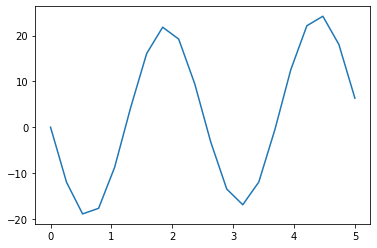

In [119]:
plt.plot(x, fx)
plt.show()

In [120]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [121]:
res = minimize(error, [2,5], method='nelder-mead', options={'xtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 242.826681
         Iterations: 64
         Function evaluations: 126


In [122]:
res1 = minimize(error, [2,5], method='COBYLA', options={'xtol': 1e-6, 'disp': True})
res1

D:\Anaconda\lib\site-packages\scipy\optimize\_minimize.py:623: OptimizeWarning: Unknown solver options: xtol
  return _minimize_cobyla(fun, x0, args, constraints, **options)


     fun: 242.84016777994267
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 35
  status: 1
 success: True
       x: array([2.08279338, 5.05970416])

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

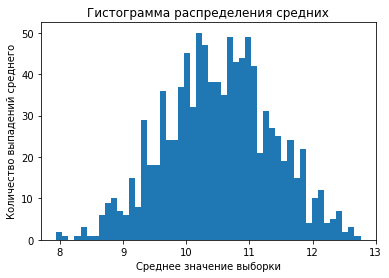

In [50]:
num = 50

num_sum = 1000
X1 = np.zeros([num_sum])
for i in range(num_sum):
    X1[i] = np.sum(np.random.randint(1, 21, size=num))/num
plt.hist(X1, 50)
plt.xlabel('Среднее значение выборки')
plt.ylabel('Количество выпадений среднего')
plt.title('Гистограмма распределения средних',fontsize=12)
plt.show()

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [17]:
m = np.array([[1, 4],
[1, 1]])
print(m)

[[1 4]
 [1 1]]


In [18]:
w, v = np.linalg.eig(m)

In [19]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
